# 2D planning with two obstacles - MPC

## Problem definition

In [26]:
include("ex8_data_mpc.jl");

## Load tools

In [27]:
@load_file "pipg_suite.jl" true
@load_file "pipg_var.jl" true
@load_file "mpc_utils.jl" true
@load_file "ex8_plotting.jl" false;

## Run MPC

In [28]:
timeit_var = mpc_utils.execute_mpc!(:warm_feas,false);

                                 ..:: MPC Simulation ::..
-------------------------------------------------------------------------------------------
  Solve Instant  |   Dyn. Err.   |  Rel. Dist. to Opt. |   Solve Time (ms)  |  JuMP Status  
-------------------------------------------------------------------------------------------
        1        |  2.772017e-04 |      4.262e-04      |      3.92e+00      |   OPTIMAL
        2        |  2.521554e-04 |      3.604e-04      |      4.65e+00      |   OPTIMAL
        3        |  2.966061e-04 |      5.510e-04      |      5.17e+00      |   OPTIMAL
        4        |  2.562260e-04 |      6.324e-04      |      4.62e+00      |   OPTIMAL
        5        |  2.872054e-04 |      7.195e-04      |      4.56e+00      |   OPTIMAL
        6        |  2.923588e-04 |      6.752e-04      |      3.90e+00      |   OPTIMAL
        7        |  2.760267e-04 |      7.160e-04      |      4.62e+00      |   OPTIMAL
        8        |  2.971106e-04 |      6.367e-04

## Visualization

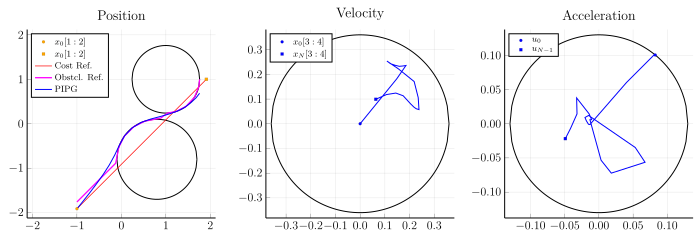

In [20]:
plotter.trajectory2D(mpc_utils.xmpc,mpc_utils.umpc[1:end-1],1,eX.yy_unscl[1:eX.N])

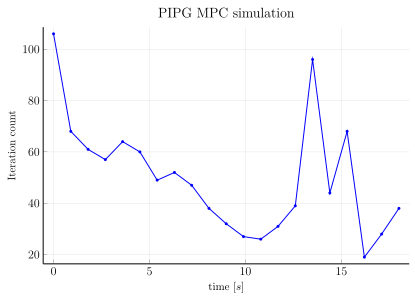

In [21]:
mpc_utils.plot_iter_count()

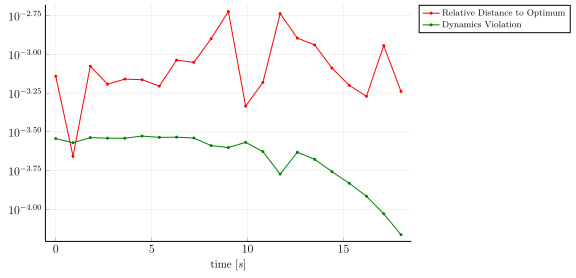

In [22]:
mpc_utils.plot_rd2o_dye()

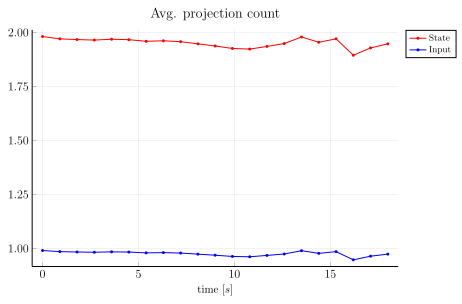

In [23]:
mpc_utils.plot_cum_proj()

## Benchmark MPC

In [29]:
show(timeit_var)

 ──────────────────────────────────────────────────────────────────────────
                                   Time                   Allocations      
                           ──────────────────────   ───────────────────────
     Tot / % measured:          3.62s / 13.7%            102MiB / 99.4%    

 Section           ncalls     time   %tot     avg     alloc   %tot      avg
 ──────────────────────────────────────────────────────────────────────────
 JuMP                  21    491ms  98.9%  23.4ms    101MiB  100%   4.82MiB
 PIPG                  21   5.44ms  1.09%   259μs     0.00B  0.00%    0.00B
 Warm-start PIPG       21   25.7μs  0.01%  1.23μs   2.30KiB  0.00%     112B
 Power iteration        1   13.6μs  0.00%  13.6μs     0.00B  0.00%    0.00B
 ──────────────────────────────────────────────────────────────────────────